In [16]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import sem, ttest_ind,fisher_exact,mannwhitneyu

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mt_data =pd.merge(mouse_data,trial_data,how='outer', on = ["Mouse ID"])
mt_data = mt_data.rename(columns={'Tumor Volume (mm3)': 'Volume'}) 
# Display the data table for preview
mt_data.head()


,Mouse ID,Drug,Timepoint,Volume,Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [46]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

means = mt_data.groupby(['Timepoint','Drug']).mean().unstack(level='Drug')['Volume']
means.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [23]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

standard_errors = mt_data.groupby(['Timepoint','Drug']).sem().unstack(level='Drug')['Volume']


standard_errors

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [21]:
time = mt_data['Timepoint'].unique()
x_axis=np.arange(0,50,5)


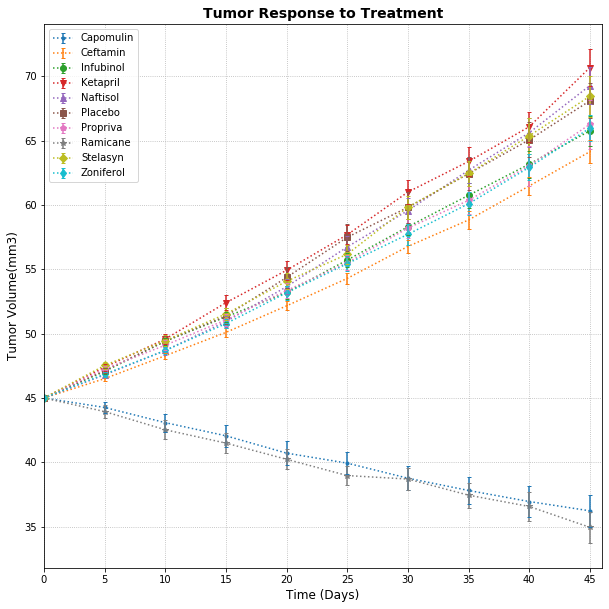

In [27]:
# Generate the Plot (with Error Bars)
#set up a figure with a decent size
fig1=plt.figure(figsize=(10,10))

#set a marker list 
markers=['.', ',', 'o', 'v', '^', 's', 'p', '*','D','d']
#set ax1 as add subplot
ax1 = fig1.add_subplot(111)

#use a for loop to extract all the mean for all timepoints for each drug one by one
#use i to access different markers in marker_list
i=0
for drug in means.columns:
    ax1.errorbar(x_axis,means[drug],yerr=standard_errors[drug],fmt=markers[i],barsabove=True,capsize=2,linestyle='dotted',label=drug)
    i+=1

#adjust plot properties
plt.legend(loc='upper left')
plt.title('Tumor Response to Treatment',fontsize=14,fontweight='bold')
plt.xlim(min(x_axis),max(x_axis)+1)
plt.xticks(x_axis)
plt.xlabel('Time (Days)',fontsize=12)
plt.ylabel('Tumor Volume(mm3)',fontsize=12)
plt.grid(linestyle='dotted')
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [43]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_means = mt_data.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']
meta_standard_errors = mt_data.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame

# Preview DataFrame
meta_means.head()
m_means = meta_means.to_frame()
m_means.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_standard_errors = mt_data.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame

# Preview DataFrame
meta_standard_errors.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


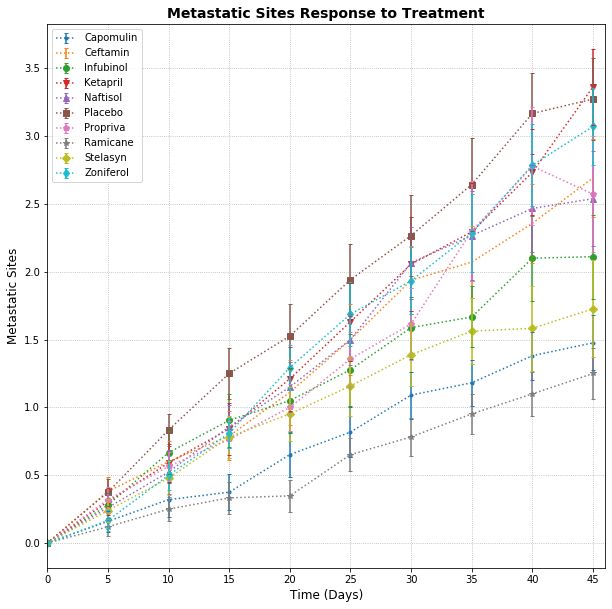

In [33]:
# Generate the Plot (with Error Bars)

#set up a figure with a decent size
fig1=plt.figure(figsize=(10,10))

#set a marker list 
markers=['.', ',', 'o', 'v', '^', 's', 'p', '*','D','d']
#set ax1 as add subplot
ax1 = fig1.add_subplot(111)

#use a for loop to extract all the mean for all timepoints for each drug one by one
#use i to access different markers in marker_list
i=0
for drug in means.columns:
    ax1.errorbar(x_axis,meta_means[drug],yerr=meta_standard_errors[drug],fmt=markers[i],barsabove=True,capsize=2,linestyle='dotted',label=drug)
    i+=1

#adjust plot properties
plt.legend(loc='upper left')
plt.title('Metastatic Sites Response to Treatment',fontsize=14,fontweight='bold')
plt.xlim(min(x_axis),max(x_axis)+1)
plt.xticks(x_axis)
plt.xlabel('Time (Days)',fontsize=12)
plt.ylabel('Metastatic Sites',fontsize=12)
plt.grid(linestyle='dotted')
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [41]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = mt_data.groupby(['Drug','Timepoint'])['Mouse ID'].count()
#survival_rate=(survival_count.iloc[:,:]/survival_count.iloc[0,:])*100
# Convert to DataFrame

# Preview DataFrame
survival_count.head()
survival = survival_count.to_frame()
survival.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [49]:
# Minor Data Munging to Re-Format the Data Frames
survival_t = survival.unstack(level='Drug')
survival_t.head()
survival_rate=(survival_t.iloc[:,:]/survival_t.iloc[0,:])*100
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


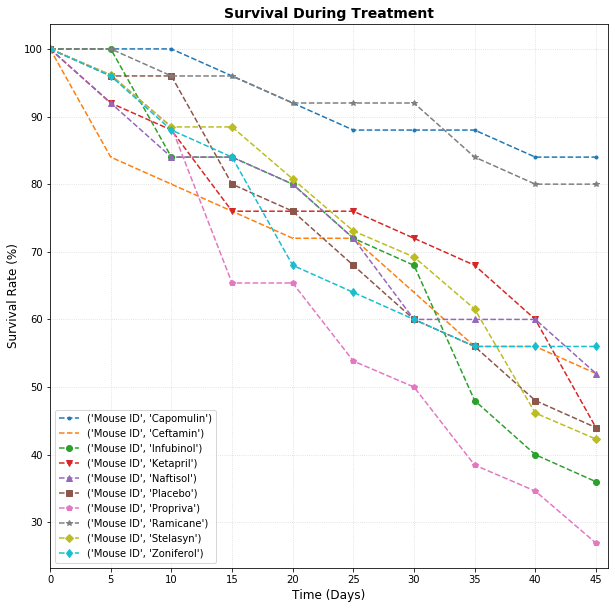

In [51]:
# Generate the Plot (Accounting for percentages)
#set up a figure with a decent size
fig3=plt.figure(figsize=(10,10))

#set ax1 as add subplot
ax3 = fig3.add_subplot(111)

#use a for loop to extract all the mean for all timepoints for each drug one by one
#use i to access different markers in marker_list
i=0
for drug in survival_rate.columns:
    ax3.errorbar(x_axis,survival_rate[drug],marker=markers[i],\
                linestyle='--',label=drug)
    i+=1

#adjust plot properties
plt.legend(loc='lower left')
plt.title('Survival During Treatment',fontsize=14,fontweight='bold')
plt.xlim(min(x_axis),max(x_axis)+1)
plt.xticks(x_axis)
plt.xlabel('Time (Days)',fontsize=12)
plt.ylabel('Survival Rate (%)',fontsize=12)
plt.grid(linestyle='dotted',alpha=0.5)
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [53]:
# Calculate the percent changes for each drug
tumor_volume_change_percentage=(100*(means.iloc[9,:]-means.iloc[0,:])/\
                                means.iloc[0,:])
# Display the data to confirm
tumor_volume_change_percentage

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

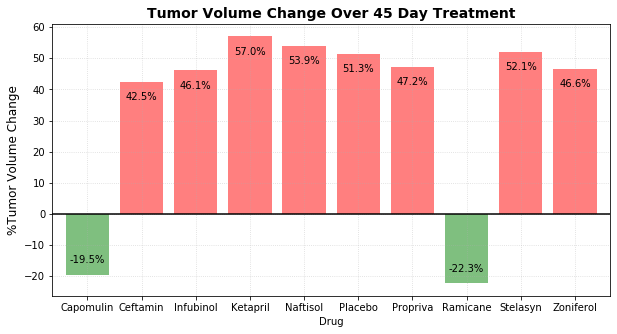

In [54]:
def _color_list_(series):
    color_list=[]
    for value in series.values:
        if value<0:
            color_list.append('g')
        else:
            color_list.append('r')
    return color_list

plt.figure(figsize=(10,5))

#pass tumor_volume_change_percentage to _color_list_ function and get a color_list
color_list=_color_list_(tumor_volume_change_percentage)

#plot the bar graph with corresponding color and other properties
ax4 = tumor_volume_change_percentage.plot(kind='bar',color=color_list,alpha=0.5,width=0.8)


for tick in ax4.get_xticklabels():
    tick.set_rotation(0)
    
#plot a horizontal line spanning the entire xaxis at y=0 
plt.axhline(y=0,color='k')

#get label, grid,titles
ax4.set_ylabel('%Tumor Volume Change',fontsize=12)
plt.grid(linestyle='dotted',alpha=0.5)
ax4.set_title("Tumor Volume Change Over 45 Day Treatment",fontsize=14,fontweight='bold')

#initiate a rects list for each rectangle from the bar graph
rects = ax4.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    # Number of points between bar and label. 
    #I want to place the label inside the bar so I set it up to a negative number
    space = -20
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    label = "{:.1f}%".format(y_value)
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va) 

plt.show()


![Metastatic Spread During Treatment](../Images/change.png)